In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_excel('music data.xlsx')

In [3]:
data.head()

,ID,Full_song_name,Author,Title,danceability,energy,key,key_code,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Antyradio,Chillzet,Czwórka,Dwójka,Eska,Jedynka,RMF_Classic,RMF_FM,RMF_MAXXX,Trójka,VOX_FM,ZET,Złote_Przeboje,Total_plays,Release_year,Antyradio_year_mean,Chillzet_year_mean,Czwórka_year_mean,Dwójka_year_mean,Eska_year_mean,Jedynka_year_mean,RMF_Classic_year_mean,RMF_FM_year_mean,RMF_MAXXX_year_mean,Trójka_year_mean,VOX_FM_year_mean,ZET_year_mean,Złote_Przeboje_year_mean,Total_plays_year_mean,Popularity,Versatility
0,272,Bill Withers - Ain't No Sunshine,Bill Withers,Ain't No Sunshine,0.594,0.789,A,9,0,-7.678,0.504,0.0742,0.001360,0.172,0.443,75.252,186629,4,0,49,1,0,0,95,797,3,0,12,145,0,393,1495,2015,0,7,0,0,0,13,113,0,0,1,20,0,56,213,48,0.505797
1,491,Chuck Mangione - Children Of Sanchez Finale,Chuck Mangione,Children Of Sanchez Finale,0.266,0.821,D,2,1,-11.947,0.499,0.2050,0.630000,0.680,0.283,177.191,235172,5,0,0,0,0,0,0,831,0,0,0,0,0,0,831,1979,0,0,0,0,0,0,83,0,0,0,0,0,0,83,12,0.000000
2,13,50 Cent - Candy Shop,50 Cent,Candy Shop,0.614,0.574,H,11,1,-7.961,0.466,0.0253,0.000032,0.380,0.755,125.173,209107,5,0,0,3,0,527,0,0,0,55,0,0,0,0,585,2005,0,0,0,0,52,0,0,0,5,0,0,0,0,58,80,0.107407
3,12,5 Seconds Of Summer - Youngblood,5 Seconds Of Summer,Youngblood,0.596,0.854,G,7,0,-5.114,0.463,0.0169,0.000000,0.124,0.152,120.274,203418,4,0,0,0,0,1354,0,0,574,823,0,0,462,0,3213,2018,0,0,0,0,338,0,0,143,205,0,0,115,0,803,81,0.626803
4,1177,Justin Bieber - Love Yourself,Justin Bieber,Love Yourself,0.609,0.378,E,4,1,-9.828,0.438,0.8350,0.000000,0.280,0.515,100.418,233720,4,0,0,0,0,1184,4,0,919,796,0,0,358,210,3471,2015,0,0,0,0,169,0,0,131,113,0,0,51,30,495,84,0.713795


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2477 non-null   int64  
 1   Full_song_name            2477 non-null   object 
 2   Author                    2477 non-null   object 
 3   Title                     2477 non-null   object 
 4   danceability              2477 non-null   float64
 5   energy                    2477 non-null   float64
 6   key                       2477 non-null   object 
 7   key_code                  2477 non-null   int64  
 8   mode                      2477 non-null   int64  
 9   loudness                  2477 non-null   float64
 10  speechiness               2477 non-null   float64
 11  acousticness              2477 non-null   float64
 12  instrumentalness          2477 non-null   float64
 13  liveness                  2477 non-null   float64
 14  valence 

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

ID                          0
Full_song_name              0
Author                      0
Title                       0
danceability                0
energy                      0
key                         0
key_code                    0
mode                        0
loudness                    0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
time_signature              0
Antyradio                   0
Chillzet                    0
Czwórka                     0
Dwójka                      0
Eska                        0
Jedynka                     0
RMF_Classic                 0
RMF_FM                      0
RMF_MAXXX                   0
Trójka                      0
VOX_FM                      0
ZET                         0
Złote_Przeboje              0
Total_plays                 0
Release_year                0
Antyradio_

#### As we can see above there are no duplicates and no n/a in our dataset.

In [7]:
print(len(data.Author.unique()))
print(2477/len(data.Author.unique()))

1275
1.9427450980392156


In [8]:
sum(i > 1 for i in data.Author.value_counts())

444

#### The 2 500 songs played between 2012 and 2022 belong to 1 275 artists. That means that on average each artist had almost 2 songs played (possibly miltiple times) during that period. Realistically there was only 444 artists whose more than one song was played, which means that over 800 authors had only one song played.

In [9]:
radio_list = ['Antyradio','Chillzet','Czwórka','Dwójka','Eska','Jedynka','RMF_Classic','RMF_FM','RMF_MAXXX','Trójka','VOX_FM','ZET','Złote_Przeboje']

In [10]:
def unique_authors_per_radio(radio_name):
    return len(data[data[radio_name] > 0].Author.unique())
    

In [11]:
unique_authors = pd.DataFrame(columns = ['Radio', 'Unique_authors'])
for i in radio_list:
    new_row = pd.Series({'Radio': i, 'Unique_authors': unique_authors_per_radio(i)})
    unique_authors = pd.concat([unique_authors, new_row.to_frame().T], ignore_index = True)
    print(i, ": ", unique_authors_per_radio(i))

Antyradio :  334
Chillzet :  591
Czwórka :  487
Dwójka :  45
Eska :  486
Jedynka :  669
RMF_Classic :  138
RMF_FM :  682
RMF_MAXXX :  419
Trójka :  637
VOX_FM :  509
ZET :  685
Złote_Przeboje :  487


In [12]:
unique_authors

,Radio,Unique_authors
0,Antyradio,334
1,Chillzet,591
2,Czwórka,487
3,Dwójka,45
4,Eska,486
5,Jedynka,669
6,RMF_Classic,138
7,RMF_FM,682
8,RMF_MAXXX,419
9,Trójka,637


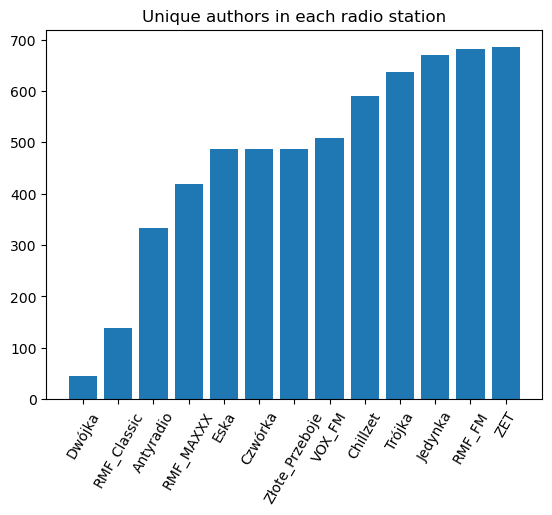

In [13]:
unique_authors_sorted = unique_authors.sort_values('Unique_authors')
plt.bar(unique_authors_sorted.Radio,unique_authors_sorted.Unique_authors)
plt.xticks(rotation = 60)
plt.title('Unique authors in each radio station')
plt.show()

#### Most of the radio stations had between 500 and 700 artists in their repertoire. The exceptions are Dwójka, RMF Classic and Antyradio. The first two play only classical music. Antyradio plays mostly heavy music, giving lower number of artists to choose from.

#### Let's take a closer look to variables used to describe each song characteristics.

In [14]:
data.head()

,ID,Full_song_name,Author,Title,danceability,energy,key,key_code,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Antyradio,Chillzet,Czwórka,Dwójka,Eska,Jedynka,RMF_Classic,RMF_FM,RMF_MAXXX,Trójka,VOX_FM,ZET,Złote_Przeboje,Total_plays,Release_year,Antyradio_year_mean,Chillzet_year_mean,Czwórka_year_mean,Dwójka_year_mean,Eska_year_mean,Jedynka_year_mean,RMF_Classic_year_mean,RMF_FM_year_mean,RMF_MAXXX_year_mean,Trójka_year_mean,VOX_FM_year_mean,ZET_year_mean,Złote_Przeboje_year_mean,Total_plays_year_mean,Popularity,Versatility
0,272,Bill Withers - Ain't No Sunshine,Bill Withers,Ain't No Sunshine,0.594,0.789,A,9,0,-7.678,0.504,0.0742,0.001360,0.172,0.443,75.252,186629,4,0,49,1,0,0,95,797,3,0,12,145,0,393,1495,2015,0,7,0,0,0,13,113,0,0,1,20,0,56,213,48,0.505797
1,491,Chuck Mangione - Children Of Sanchez Finale,Chuck Mangione,Children Of Sanchez Finale,0.266,0.821,D,2,1,-11.947,0.499,0.2050,0.630000,0.680,0.283,177.191,235172,5,0,0,0,0,0,0,831,0,0,0,0,0,0,831,1979,0,0,0,0,0,0,83,0,0,0,0,0,0,83,12,0.000000
2,13,50 Cent - Candy Shop,50 Cent,Candy Shop,0.614,0.574,H,11,1,-7.961,0.466,0.0253,0.000032,0.380,0.755,125.173,209107,5,0,0,3,0,527,0,0,0,55,0,0,0,0,585,2005,0,0,0,0,52,0,0,0,5,0,0,0,0,58,80,0.107407
3,12,5 Seconds Of Summer - Youngblood,5 Seconds Of Summer,Youngblood,0.596,0.854,G,7,0,-5.114,0.463,0.0169,0.000000,0.124,0.152,120.274,203418,4,0,0,0,0,1354,0,0,574,823,0,0,462,0,3213,2018,0,0,0,0,338,0,0,143,205,0,0,115,0,803,81,0.626803
4,1177,Justin Bieber - Love Yourself,Justin Bieber,Love Yourself,0.609,0.378,E,4,1,-9.828,0.438,0.8350,0.000000,0.280,0.515,100.418,233720,4,0,0,0,0,1184,4,0,919,796,0,0,358,210,3471,2015,0,0,0,0,169,0,0,131,113,0,0,51,30,495,84,0.713795


In [15]:
data['key'].value_counts().sort_values(ascending = False)

C     322
A     258
G     258
D     233
C#    220
F     218
E     205
H     203
F#    168
B     153
G#    151
D#     88
Name: key, dtype: int64

#### As we can see C key is the most popular one with the rest being quite close to each other. Exception is D# - in this key only 88 songs was played. However to see a bigger picture we should check how it looks when we take under concideration also the "mode". This way we'll compare popularity of each scale.

In [16]:
data[['key', 'mode']].value_counts().sort_values(ascending = False)

key  mode
C    1       230
G    1       183
D    1       172
A    1       147
C#   1       135
H    0       134
F    1       115
G#   1       114
A    0       111
E    0       111
F    0       103
E    1        94
C    0        92
F#   0        90
C#   0        85
B    0        82
F#   1        78
G    0        75
B    1        71
H    1        69
D    0        61
D#   0        44
     1        44
G#   0        37
dtype: int64

#### For sure major scales (mode: 1) are more popular. Also it seems that some specific chords are more popular than others. Quick explanation:
##### Some scales share chords between each other. To be more precise there is always a pair of scales (where one of them is major and the other minor) that share the same chords.
##### Examples based on our top results goes:
##### C-major (key: C, mode: 1) - A-minor (key: A, mode: 0)
##### G-major (key: G, mode: 1) - E-minor (key: E, mode: 0)
##### D-major (key: D, mode: 1) - H-minor (key: H, mode: 0)
##### A-major (key: A, mode: 1) - F#-minor (key: F#, mode: 0)
#### We can see that for each popular major scale it's "pair" is also relatively popular among the minor scales. Similarly a "pair" for G#-minor - the least popular scale - is H-major, which is also almost the least popular scale among the major scales.

In [17]:
data['time_signature'].value_counts().sort_values(ascending = False)

4    2366
3      91
5      16
1       4
Name: time_signature, dtype: int64

#### Songs with time signature 4 are played the most in polish radio stations. Not a surprise here. The majority of songs are composed with time signature 4, since it's a lot more accessible.

In [18]:
data[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']].describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,0.611408,0.696055,-7.183340,0.057741,0.184393,0.045127,0.179207,0.559990,120.307622,236685.570852
std,0.146367,0.197508,3.201585,0.049358,0.237276,0.143809,0.142324,0.241693,24.614891,54317.047728
min,0.135000,0.020700,-22.397000,0.022400,0.000003,0.000000,0.017300,0.034800,59.182000,101400.000000
25%,0.518000,0.576000,-8.862000,0.032600,0.012900,0.000000,0.088900,0.373000,102.561000,203418.000000
50%,0.626000,0.730000,-6.506000,0.041200,0.074300,0.000057,0.125000,0.564000,120.148000,228000.000000
75%,0.715000,0.853000,-4.830000,0.060900,0.266000,0.004210,0.230000,0.762000,131.023000,260640.000000
max,0.970000,0.999000,-0.277000,0.504000,0.992000,0.986000,0.989000,0.992000,209.259000,572776.000000


#### Differences between median and mean sugest strongly asymetrical distribution for "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", and to some extent "energy". Let's see it on the graphics.

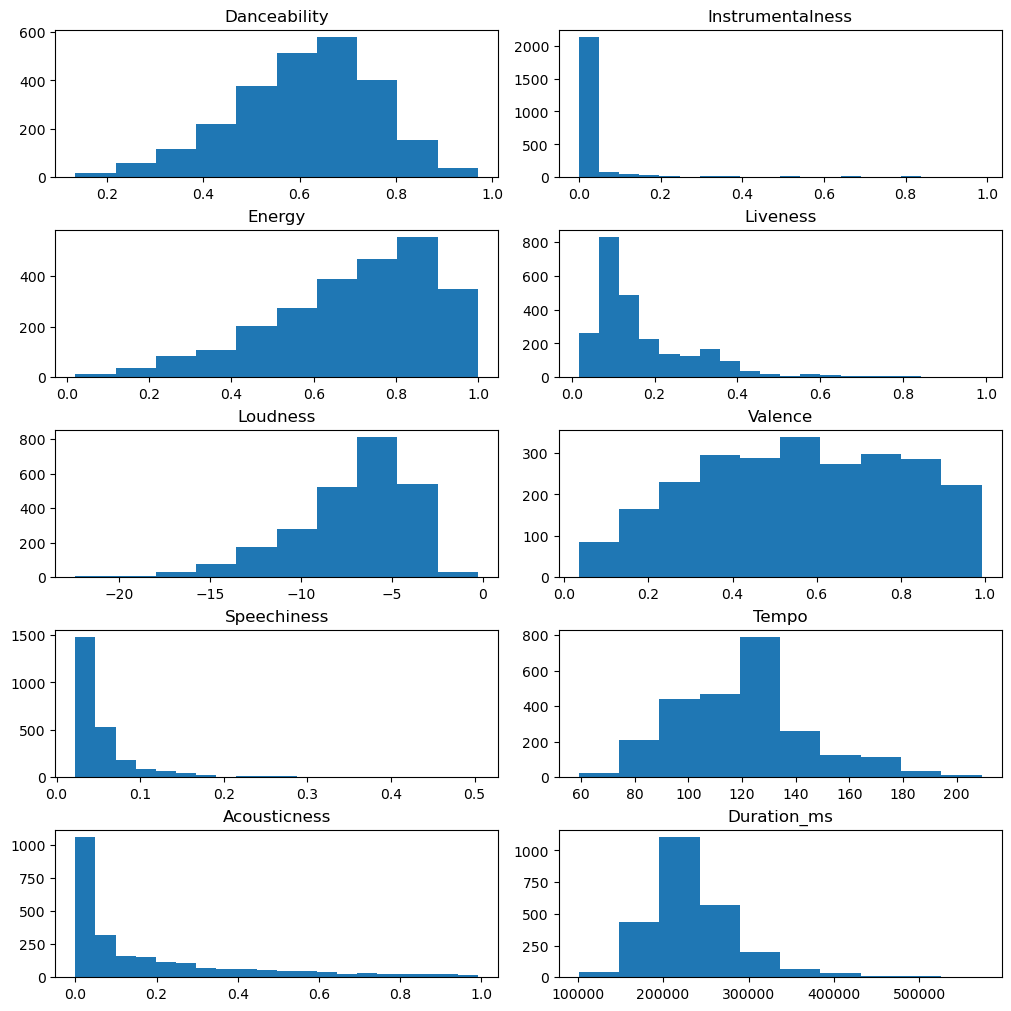

In [19]:
fig, ax = plt.subplots(5,2,figsize=(10,10),layout='constrained' )

ax[0,0].hist(data['danceability'],bins=10)
ax[0,0].set_title('Danceability')
ax[1,0].hist(data['energy'],bins=10)
ax[1,0].set_title('Energy')
ax[2,0].hist(data['loudness'],bins=10)
ax[2,0].set_title('Loudness')
ax[3,0].hist(data['speechiness'],bins=20)
ax[3,0].set_title('Speechiness')
ax[4,0].hist(data['acousticness'],bins=20)
ax[4,0].set_title('Acousticness')
ax[0,1].hist(data['instrumentalness'],bins=20)
ax[0,1].set_title('Instrumentalness')
ax[1,1].hist(data['liveness'],bins=20)
ax[1,1].set_title('Liveness')
ax[2,1].hist(data['valence'],bins=10)
ax[2,1].set_title('Valence')
ax[3,1].hist(data['tempo'],bins=10)
ax[3,1].set_title('Tempo')
ax[4,1].hist(data['duration_ms'],bins=10)
ax[4,1].set_title('Duration_ms')



#plt.hist(data[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']],bins=20)
plt.show()

#### Finally let's take a look at some of the linear correlations in our dataset

In [20]:
data.columns

Index(['ID', 'Full_song_name', 'Author', 'Title', 'danceability', 'energy',
       'key', 'key_code', 'mode', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'Antyradio', 'Chillzet', 'Czwórka', 'Dwójka', 'Eska',
       'Jedynka', 'RMF_Classic', 'RMF_FM', 'RMF_MAXXX', 'Trójka', 'VOX_FM',
       'ZET', 'Złote_Przeboje', 'Total_plays', 'Release_year',
       'Antyradio_year_mean', 'Chillzet_year_mean', 'Czwórka_year_mean',
       'Dwójka_year_mean', 'Eska_year_mean', 'Jedynka_year_mean',
       'RMF_Classic_year_mean', 'RMF_FM_year_mean', 'RMF_MAXXX_year_mean',
       'Trójka_year_mean', 'VOX_FM_year_mean', 'ZET_year_mean',
       'Złote_Przeboje_year_mean', 'Total_plays_year_mean', 'Popularity',
       'Versatility'],
      dtype='object')

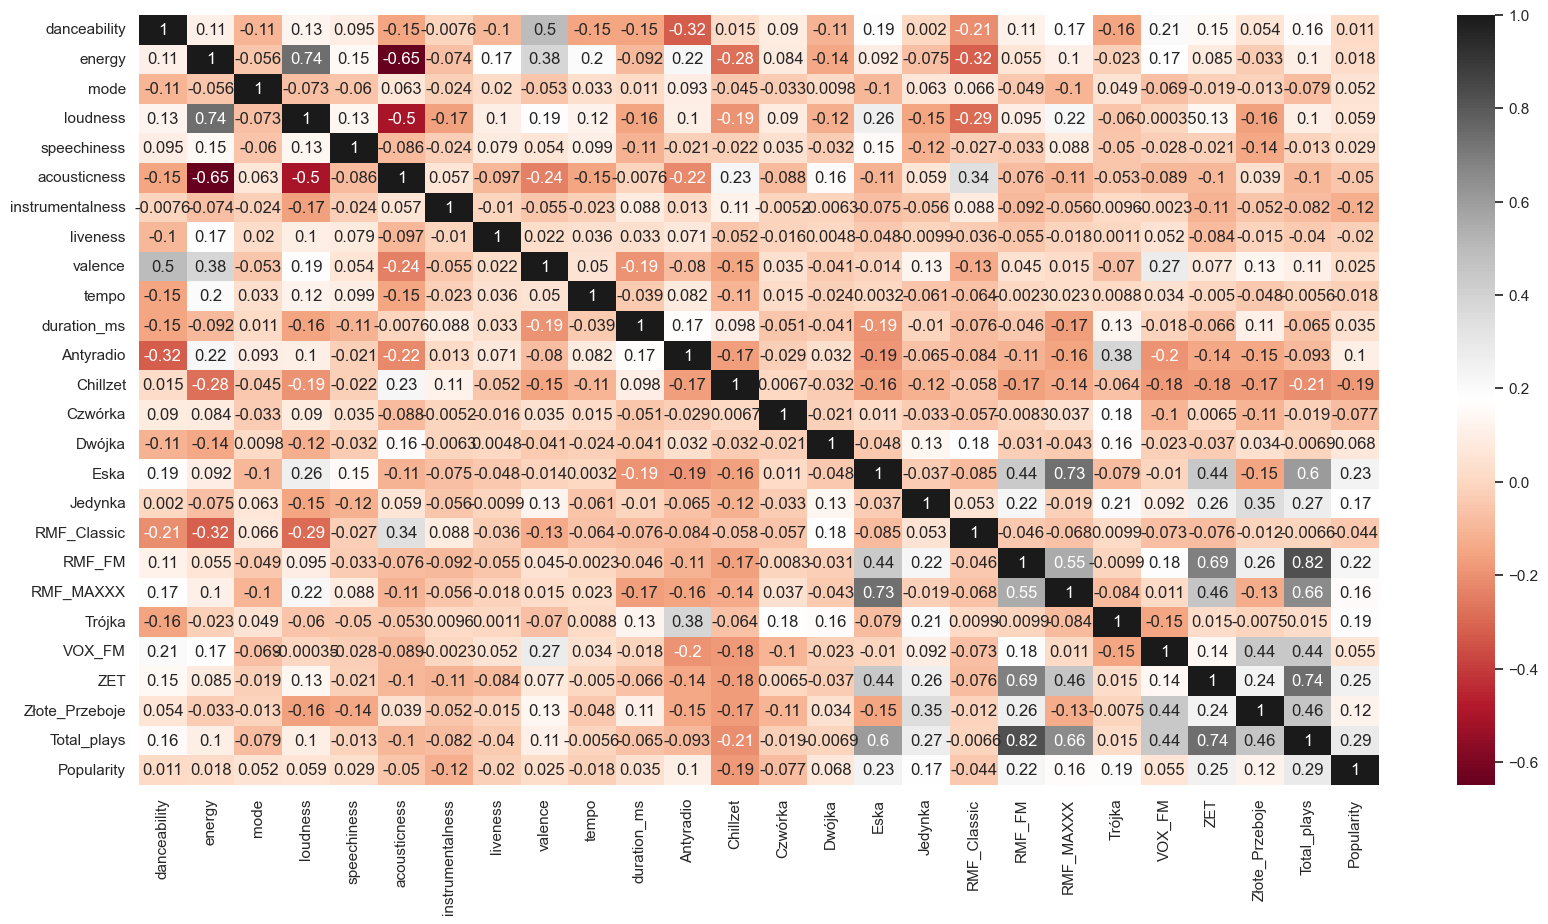

In [26]:
sns.heatmap(data[['danceability', 'energy',
       'mode', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','Antyradio', 'Chillzet', 'Czwórka', 'Dwójka', 'Eska',
       'Jedynka', 'RMF_Classic', 'RMF_FM', 'RMF_MAXXX', 'Trójka', 'VOX_FM',
       'ZET', 'Złote_Przeboje', 'Total_plays','Popularity']].corr(), annot = True, cmap= 'RdGy')
sns.set (rc = {'figure.figsize':(20, 10)})
plt.show()

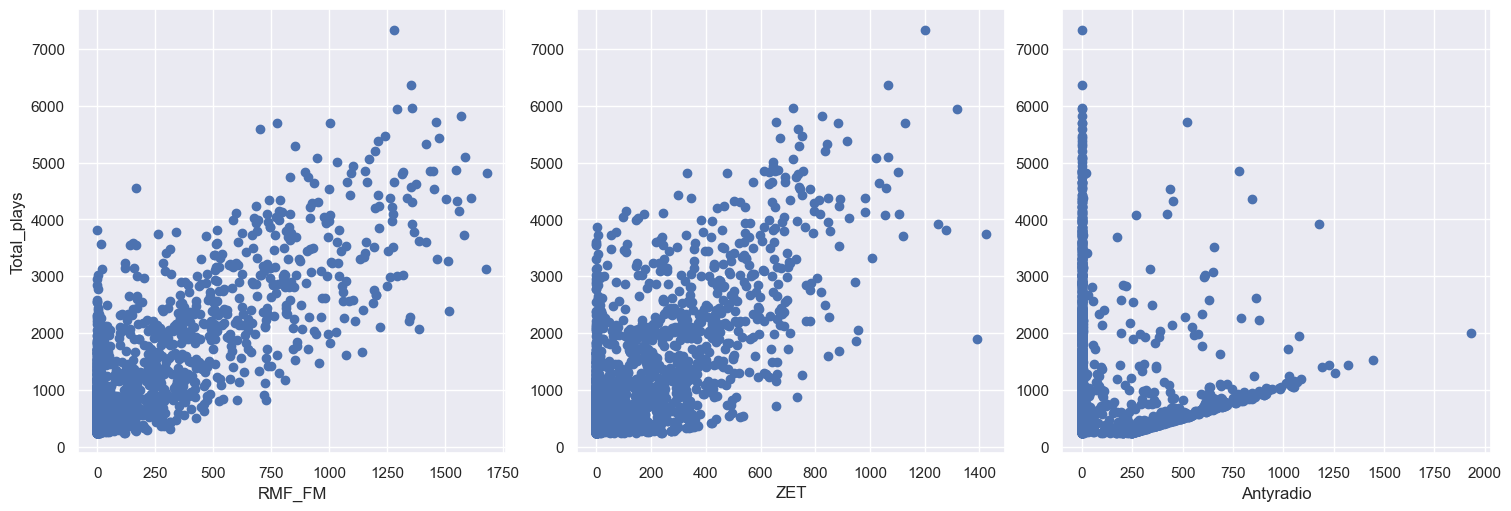

In [22]:
fig, ax = plt.subplots(1,3,figsize=(15,5),layout='constrained' )
ax[0].scatter(y = data.Total_plays, x = data.RMF_FM, )
ax[0].set_xlabel('RMF_FM')
ax[0].set_ylabel('Total_plays')
ax[1].scatter(y = data.Total_plays, x = data.ZET, )
ax[1].set_xlabel('ZET')
ax[2].scatter(y = data.Total_plays, x = data.Antyradio, )
ax[2].set_xlabel('Antyradio')
plt.show()

#### Scatter plots above illustrate correlation between Total_plays and 3 radio stations. Correlation between the first two is relatively high. Antyradio on the other hand has correlation value close to 0, which is also quite well visible on the plot. 

#### There are also some strong (-ish) correlations between "energy", "loudness" and "acousticness". 

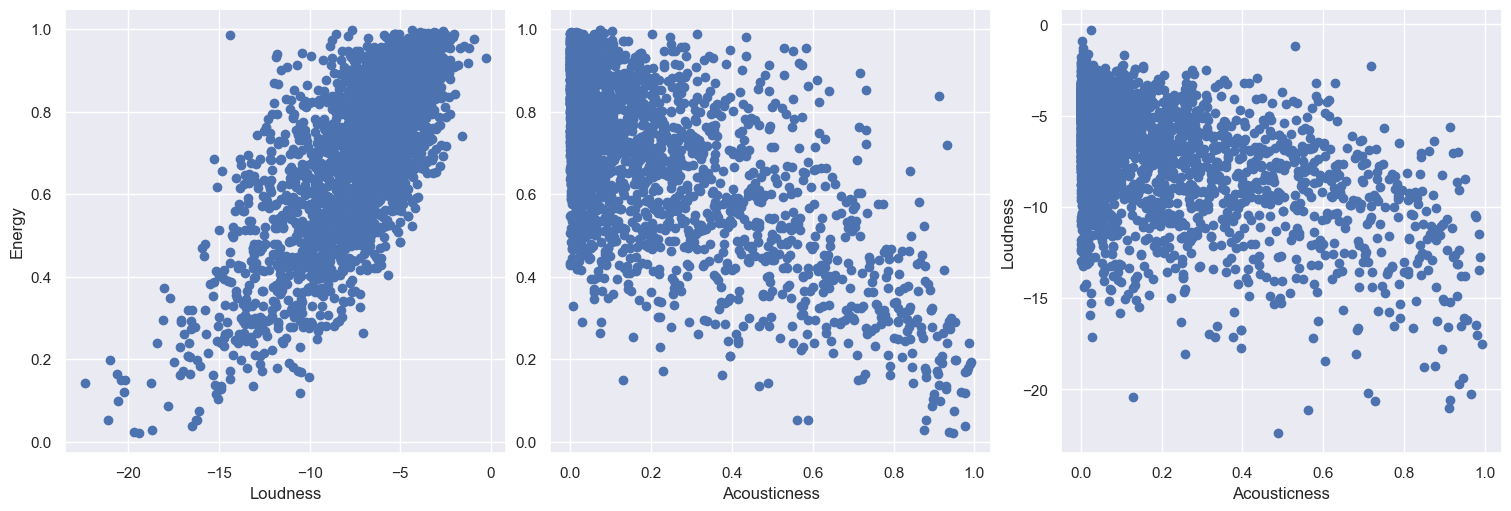

In [23]:
fig, ax = plt.subplots(1,3,figsize=(15,5),layout='constrained' )
ax[0].scatter(y = data.energy, x = data.loudness, )
ax[0].set_xlabel('Loudness')
ax[0].set_ylabel('Energy')
ax[1].scatter(y = data.energy, x = data.acousticness, )
ax[1].set_xlabel('Acousticness')
ax[2].scatter(y = data.loudness, x = data.acousticness, )
ax[2].set_xlabel('Acousticness')
ax[2].set_ylabel('Loudness')
plt.show()

#### Surprisingly there are no strong correlations with "popularity". Neither with songs characteristics nor in radio plays.